## HR ANALYTICS




### Importing the necessary libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (8.5,7.0)

##### Loading the data 

In [2]:
train = pd.read_csv("train_hr.csv")
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
print("Shape of train data is:", train.shape)

Shape of train data is: (54808, 14)


In [4]:
test = pd.read_csv("test_hr.csv")
test.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [5]:
print('Shape of test data is:', test.shape)

Shape of test data is: (23490, 13)


##### Data types 

In [6]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

##### Null values

In [7]:
print("Null values in train data:")
train.isna().sum()

Null values in train data:


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
print("Null values in test data:")
test.isna().sum()

Null values in test data:


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

**Data Visualization**

##### Correlation

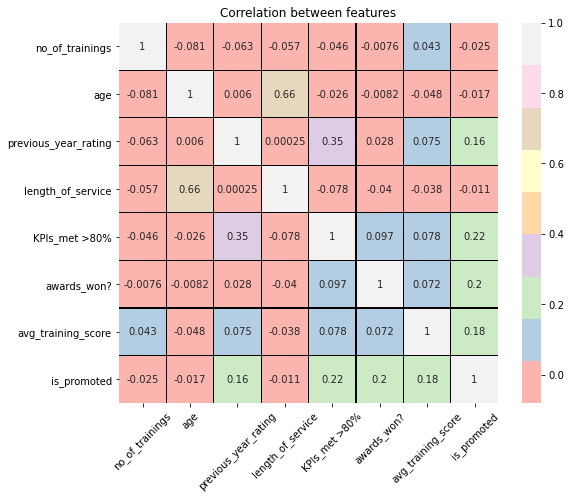

In [9]:
corr = train.iloc[:,1:].corr()
sns.heatmap(corr, linewidth = 0.1, linecolor = "black", cmap = sns.color_palette("Pastel1"),
           annot = True)
plt.autoscale(enable=True, axis='y')
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)
plt.title("Correlation between features")
plt.show()

#### Here, we can see that the promotion has significant correlation with previous year rating, KPI's met > 80, awards won and average training score. This will be useful in creating new features.

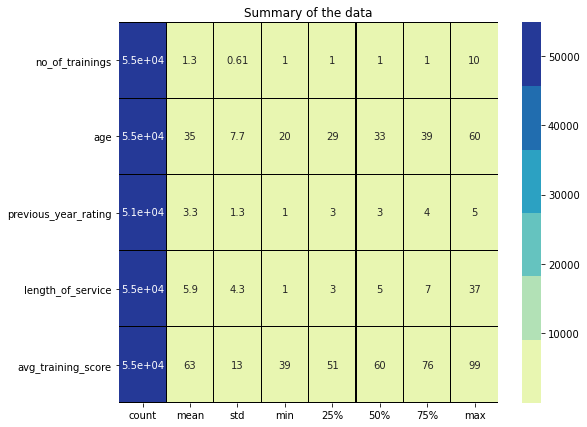

In [10]:
summary = train.loc[:, ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']].describe()
sns.heatmap(summary.transpose(), annot = True, linewidth = 0.1, linecolor = 'black', cmap = sns.color_palette("YlGnBu"))
plt.autoscale(enable=True, axis='y')
plt.title("Summary of the data")
plt.show()

 ### Checking for Outliers

Text(0.5, 1.0, 'Boxplot')

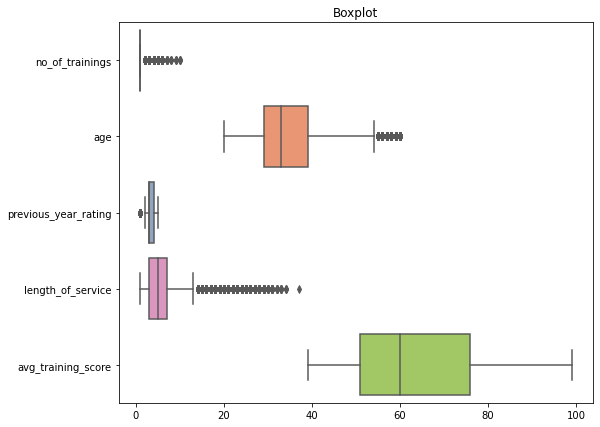

In [11]:
ax = sns.boxplot(data=train.loc[:, ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']], orient="h", palette="Set2")
plt.title("Boxplot")

### Countplots for categorical variables 

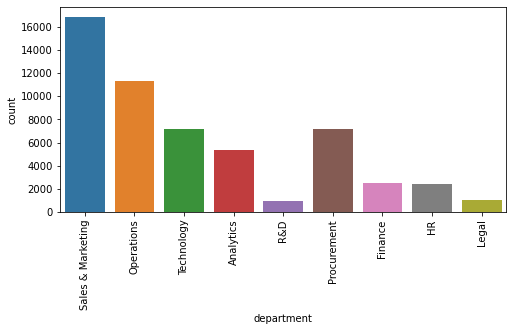

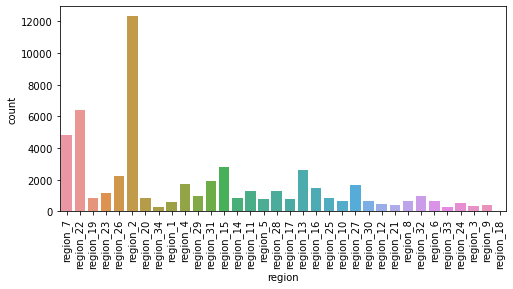

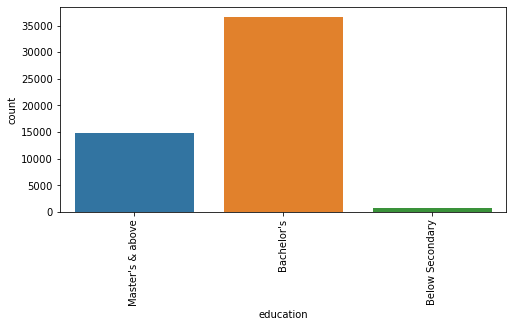

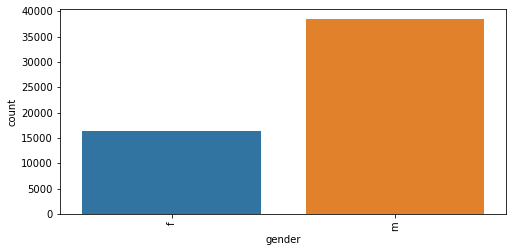

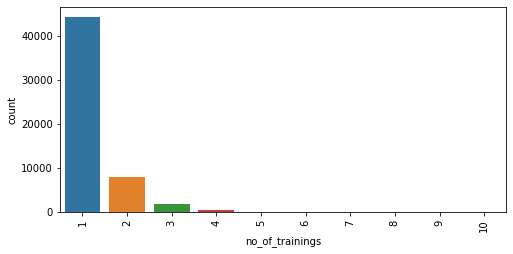

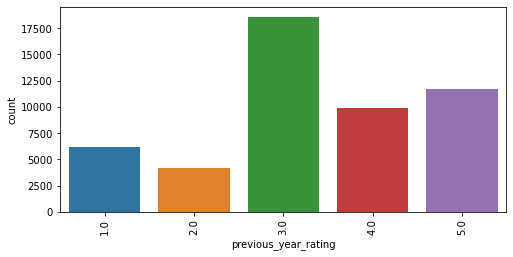

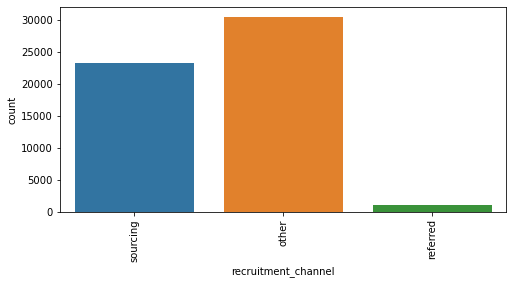

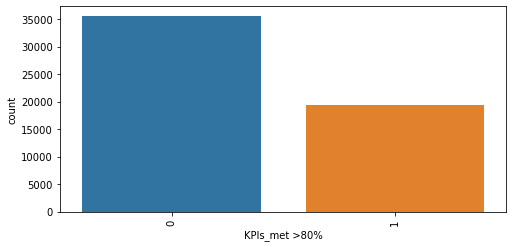

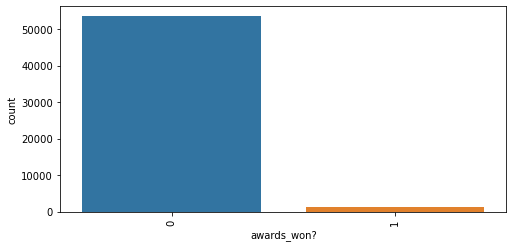

In [12]:
cols = ['department', 'region','education', 'gender', 'no_of_trainings',
        'previous_year_rating', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']

def countplots(i):
    plt.figure(figsize = (8,40))
    plt.subplot(9,1,i+1)
    sns.countplot(train[cols[i]])
    plt.xticks(rotation = 90)
    plt.show()

for x in range(len(cols)):
    countplots(x)

### Proportion of target variable in the data 




In [13]:
#Number of 'not promoted' and 'promoted' employees
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

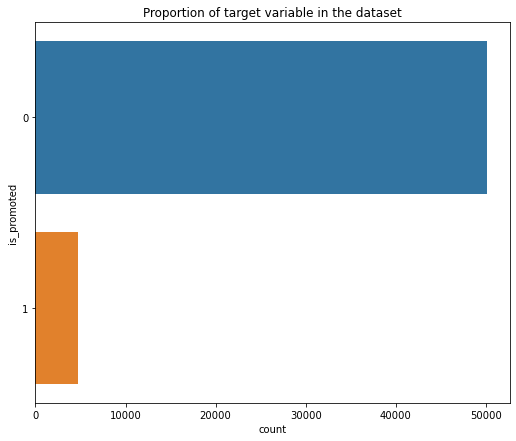

In [14]:
#Bar chart
train['is_promoted'].value_counts()
ax = sns.countplot(y = train['is_promoted'])
plt.title("Proportion of target variable in the dataset")
plt.show()

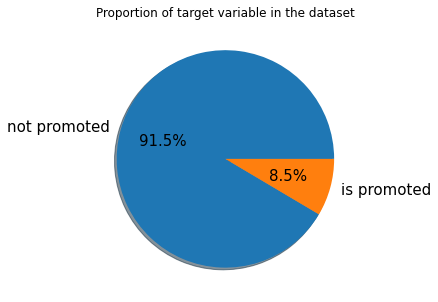

In [15]:
#Pie chart
plt.figure(figsize = (8,5))
plt.pie(train['is_promoted'].value_counts(), autopct = '%1.1f%%', labels = ['not promoted', 'is promoted'],
       shadow = True, textprops = {'fontsize':15})
plt.title("Proportion of target variable in the dataset")
plt.show()

### Data Preprocessing

##### Missing value imputation

In [16]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

In [17]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(-999)

In [18]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Creating some useful functions

##### Feature engineering

I created 4 features from observing correlation plot as well as running a CatBoost model without parameter tuning; which are explained below

Total training score: Product of average training score and number of trainings
Joining age: Age of the employee - Length of service

kpi_dept: KPIs met and department were two very important features so I combined them to create a new categorical feature combining the 2

kpi_ats_cat: Categorical feature created by combining kpis met and average training score

kpi_ats_num: Multiplication of kpis met and average training score - it captures the average score of specifically those employees whose kpis met condition was specified

In [19]:
def feature_generator(data):  #generates feature for given data
                              #Returns none
    #Feature
    data['total_training_score'] = data['avg_training_score']*data['no_of_trainings']

    #feature
    data['joining_age'] = data['age'] - data['length_of_service'] 

    #feature
    data['kpi_dept'] = data['department'].astype('str') + '_' + data['KPIs_met >80%'].astype('str') 

    #train = train.set_index('employee_id')

    data['kpi_dept'] = data['kpi_dept'].astype('category')

    #feature
    data['kpi_ats_cat'] = data['avg_training_score'].astype('str') + '_' + data['KPIs_met >80%'].astype('str') 

    #feature
    data['kpi_ats_num'] = data['avg_training_score'] *data['KPIs_met >80%'].astype('int64') 

    #specify categories
    cols = ['department', 'region', 'education', 'gender', 'recruitment_channel', 
            'KPIs_met >80%', 'awards_won?','kpi_dept', 'kpi_ats_cat']
    for i in cols:
        data[i] = data[i].astype('category')

    data['previous_year_rating'] = data['previous_year_rating'].astype('int')

##### Data Splitting + SMOTE

In [20]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [21]:
def split_XY(data, smote): #Uses smote to generate new samples if True, else simply splits X and y components of data
                           #Returns X, y
    X = data.drop(['is_promoted'], axis = 1)
    y = data['is_promoted']
    
    #specify categories
    cols = ['department', 'region', 'education', 'gender', 'recruitment_channel', 
            'KPIs_met >80%', 'awards_won?']
    for i in cols:
        data[i] = data[i].astype('category')
        
    if smote == True:
        from imblearn.over_sampling import SMOTENC
        smote_nc = SMOTENC(categorical_features = np.where(X.dtypes == 'category')[0], 
                           random_state=5)
        X_resampled, y_resampled = smote_nc.fit_resample(X, y)
        return(X_resampled, y_resampled)
    
    elif smote == False:
        return(X, y)

##### Normalizing/Standardizing the data

from sklearn.preprocessing import StandardScaler, Normalizer
temp = train.copy()
num_cols = ['no_of_trainings', 'age', 
                      'previous_year_rating', 'length_of_service', 'avg_training_score']
temp[num_cols] = StandardScaler().fit_transform(temp[num_cols])
print(temp.head())
    

In [22]:
def normalize_standardize(data, operation): #If operation = 'normalize', then normalizes data (train)
                                            #If operation = 'standardize', then standardizes data
                                            #Returns none
    from sklearn.preprocessing import StandardScaler, Normalizer
    num_cols = ['no_of_trainings', 'age', 
                      'previous_year_rating', 'length_of_service', 'avg_training_score', 
                      'total_training_score', 'joining_age', 'kpi_ats_num']
    if operation == 'standardize':
        data[num_cols] = StandardScaler().fit_transform(data[num_cols])
    
    if operation == 'normalize':
        data[num_cols] = Normalizer().fit_transform(data[num_cols])
        
    if operation == None:
        data[num_cols] = StandardScaler().fit_transform(data[num_cols])
        

##### Feature encoding

In [23]:
def encoding(data, method): #Encodes the data as per selected 'method' parameter
                            #method : 'mean', 'label', 'onehot'
                            #Returns none
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    le = LabelEncoder()
    #ohe = OneHotEncoder(drop = 'first')

    cat_cols =  ['department', 'region', 
                 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?','kpi_dept', 'kpi_ats_cat']
    
    num_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 
                      'total_training_score', 'joining_age', 'kpi_ats_num']
    
    if method == 'mean':
        for i in cat_cols:
            mean_encoded_subject = data.groupby(i)['is_promoted'].mean().to_dict() 
            data[i] =  data[i].map(mean_encoded_subject)
          

    if method == 'label':
        for i in cat_cols:
            data[i] = le.fit_transform(data[i])
            data[i] = data[i].astype('category')        
    
    if method == 'onehot':
        for i in cat_cols:
            data[i] = le.fit_transform(data[i])
            data[i] = data[i].astype('category')
        data = pd.get_dummies(data, drop_first = True, columns = cat_cols)
        
    return(data)
     

In [24]:
def data_split(data, X , y): #Splits the X and y components of data into training and cross validation set
                             #data if data is unsplit(into X and y) ; X,y if data is split into X and y
                             #Returns X_train, X_cv, y_train, y_cv
    if X is None:
        X_train, X_cv, y_train, y_cv = train_test_split(data.drop('is_promoted', axis = 1), data.is_promoted, test_size = 0.2, shuffle = True)
    elif data is None:
        X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, shuffle = True)
        
    print('Shape of X_train',X_train.shape)
    print('Shape of X_cv', X_cv.shape)
    print('Shape of y_train', y_train.shape)
    print('Shape of y_cv',y_cv.shape)
    
    return(X_train, X_cv, y_train, y_cv)

##### Model Building 

Here, I have used Randomized Search approach for all models.

In [25]:
def model_building(algo, X_train, y_train, X_cv, y_cv, learning_rate, folds): 
    #Builds and evaluates model
    #algo : 'xgb', 'lgm', 'etc', 'rfc', 'cbc'
    #learning_rate : the rate at which model is trained
    #folds : number of cross validation folds
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import average_precision_score

    if algo == 'lgb':
        print("Training LightGBM model..........................................................................")
        param_grid = {
        'learning_rate': np.arange(0.01, 0.11, 0.01),
        'max_depth': np.arange(3, 10, 1),
        'scale_pos_weight': np.arange(5, 50, 5),
        'reg_lambda': np.arange(100, 1000, 100)
                 }

        lgb = LGBMClassifier()
        model = RandomizedSearchCV(
        estimator = lgb,
        param_distributions = param_grid,
        scoring = 'f1',
        verbose = 100,
        n_jobs = -1,
        cv = folds,
        random_state = 3)
        
        model.fit(X_train, y_train, eval_set = (X_cv, y_cv))
        print(model.best_score_)
        print(model.best_estimator_.get_params())
        #lgb_pred = lgb.predict(X_cv)
        
        return(model)
    
    elif algo == 'xgb':
        print("Training XGBoost model..........................................................................")        
        param_grid = {
        'learning_rate': np.arange(0.01, 0.11, 0.01),
        'max_depth': np.arange(3, 10, 1),
        'scale_pos_weight': np.arange(5, 50, 5),
        'n_estimators' : np.arange(100, 1000, 100),
        'colsample_bytree' : np.arange(0.1, 1, 0.1),
        'max_delta_step' : np.arange(0.1, 1, 0.1)
                 }

        xgb = XGBClassifier()
        model = RandomizedSearchCV(
        estimator = xgb,
        param_distributions = param_grid,
        scoring = 'f1',
        verbose = 100,
        n_jobs = -1,
        cv = folds,
        random_state = 3)
        
        model.fit(X_train, y_train)
        print(model.best_score_)
        print(model.best_estimator_.get_params())
        print('Model trained.')
        return(model)
    
    elif algo == 'rfc':
        print("Training Random Forest Classifier model..........................................................................")
        rfc = RandomForestClassifier(random_state = 45)
        param_grid = {
        'min_samples_split': np.arange(2, 15, 1),
        'max_depth': np.arange(3, 10, 1),
        'class_weight': ['balanced', 'balanced_subsample'],
        'criterion' : ['gini', 'entropy'],
        'n_estimators' : np.arange(100, 1000, 100),
                 }
        
        model = RandomizedSearchCV(
        estimator = rfc,
        param_distributions = param_grid,
        scoring = 'f1',
        verbose = 100,
        n_jobs = -1,
        cv = folds,
        random_state = 3)
        
        model.fit(X_train, y_train)
        print(model.best_score_)
        print(model.best_estimator_.get_params())
        print('Model trained.')
        return(model)
    
        
    elif algo == 'etc':
        print("Training Extra Trees model..........................................................................")
        etc = ExtraTreesClassifier()
        param_grid = {
        'min_samples_split': np.arange(2, 15, 1),
        'max_depth': np.arange(3, 10, 1),
        'class_weight': ['balanced', 'balanced_subsample'],
        'criterion' : ['gini', 'entropy'],
        'n_estimators' : np.arange(100, 1000, 100),
                 }
        
        model = RandomizedSearchCV(
        estimator = etc,
        param_distributions = param_grid,
        scoring = 'f1',
        verbose = 100,
        n_jobs = -1,
        cv = folds,
        random_state = 3)
        
        model.fit(X_train, y_train)
        print(model.best_score_)
        print(model.best_estimator_.get_params())
        print('Model trained.')
        return(model)
    
    elif algo == 'cbc':
        print("Training CatBoost model..........................................................................")
        cbc = CatBoostClassifier()

        param_grid = {
        'iterations': np.arange(500, 4000, 500),
        'learning_rate': np.arange(0.01, 0.11, 0.01),
        'max_depth': np.arange(3, 10, 1),
        'l2_leaf_reg': np.arange(1000, 100000, 500),
        'random_strength': np.arange(1, 10),
        'class_weights' :[[4,10], [3, 7], [1,9], [7, 12]]
                 }

        model = RandomizedSearchCV(
        estimator = cbc,
        param_distributions = param_grid,
        scoring = 'f1',
        verbose = 1000,
        n_jobs = -1,
        cv = folds,
        random_state = 3)
        
        model.fit(X_train, y_train, cat_features = np.where(X_train.dtypes == 'category')[0],
                  eval_set = (X_cv, y_cv), plot = True)
        print('Model trained.')
        print(model.best_score_)
        print(model.best_estimator_.get_params())

        return(model)
    
   


In [26]:
def evaluation(model, X_cv, y_cv):
    pred = model.predict(X_cv)
    print("Classification Report:", classification_report(y_cv, pred))
    
    '''
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X_cv.values, y_cv.values, scoring='f1', cv=cv, n_jobs=-1)
    # summarize performance
    print('Mean F1 score: %.5f' % np.mean(scores))
    '''    
    
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix(y_cv, pred), annot = True,
                fmt = "d", linecolor = "k", linewidths = 3)
    print("Precision is:", precision_score(y_cv, pred))
    print("Recall is:", recall_score(y_cv, pred))
    plt.autoscale(enable=True, axis='y')
    plt.show()


#### Now we can start building models

We will follow the sequence given below:

1. First we will use SMOTE to balance the train data and split it into X and y components
2. Then, we will split the train and cross validation sets
3. Generate new features separately for train and cv data
4. Normalize/Scale 
5. Feature encoding for categorical data
6. Create different models using different algorithms


In [27]:
#Step 1
X, y = split_XY(train, smote = False)

In [28]:
#Step 2
X_train, X_cv, y_train, y_cv = data_split(data = None,X = X, y = y)

Shape of X_train (43846, 13)
Shape of X_cv (10962, 13)
Shape of y_train (43846,)
Shape of y_cv (10962,)


In [29]:
#Step 3
feature_generator(X_train)
feature_generator(X_cv)

In [30]:
#Step 4
normalize_standardize(data = X_train, operation = 'normalize')
normalize_standardize(data = X_cv, operation = 'normalize')

In [31]:
#Step 5
#For catboost algorithm, the features don't need to be encoded, so we will create a copy 
#of the data and then apply encoding

X_train_enc = X_train.copy()
X_cv_enc = X_cv.copy()

X_train_enc = encoding(data = X_train_enc, method = 'onehot')

X_cv_enc = encoding(data = X_cv_enc, method = 'onehot')


In [32]:
print(X_train.columns)
print(X_train_enc.columns)
print(X_train_enc.shape)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'total_training_score', 'joining_age', 'kpi_dept',
       'kpi_ats_cat', 'kpi_ats_num'],
      dtype='object')
Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'avg_training_score', 'total_training_score',
       'joining_age', 'kpi_ats_num', 'department_1',
       ...
       'kpi_ats_cat_111', 'kpi_ats_cat_112', 'kpi_ats_cat_113',
       'kpi_ats_cat_114', 'kpi_ats_cat_115', 'kpi_ats_cat_116',
       'kpi_ats_cat_117', 'kpi_ats_cat_118', 'kpi_ats_cat_119',
       'kpi_ats_cat_120'],
      dtype='object', length=194)
(43846, 194)


Check the distribution of train and test data

In [37]:
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_train_enc)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color= y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

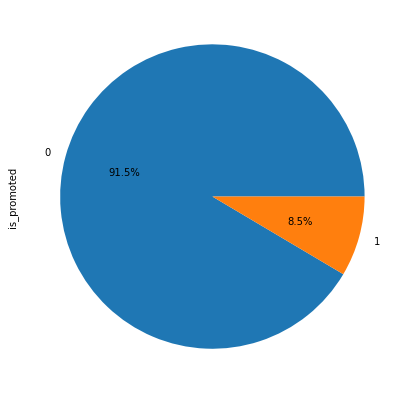

In [33]:
y_train.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

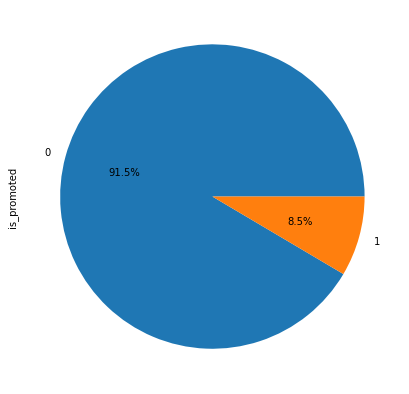

In [34]:
y_cv.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

#### Now the data is ready for the algorithm. We will use X_train and X_cv for CatBoost & X_train_enc and X_cv_enc for other algorithms

#### Removing employee id and the columns whic are present in train data but not cv

In [35]:
if 'employee_id' in X_train.columns and 'employee_id' in X_train_enc.columns and 'employee_id' in X_cv.columns and 'employee_id' in X_cv_enc.columns:
    X_train = X_train.drop('employee_id', axis = 1)
    X_train_enc = X_train_enc.drop('employee_id', axis = 1)
    X_cv = X_cv.drop('employee_id', axis = 1)
    X_cv_enc = X_cv_enc.drop('employee_id', axis = 1)

In [36]:
print(list(set(X_train_enc.columns).symmetric_difference(set(X_cv_enc.columns))))

['kpi_ats_cat_119', 'kpi_ats_cat_120']


In [37]:
#Since cv data doesnt contain these 2 features, we will drop them from train data 

#if 'kpi_ats_cat_119' in X_train_enc.columns:
#    X_train_enc = X_train_enc.drop('kpi_ats_cat_119', axis = 1)
    
#if 'kpi_ats_cat_120' in X_train_enc.columns:
    #X_train_enc = X_train_enc.drop('kpi_ats_cat_120', axis = 1)
    
X_train_enc = X_train_enc.drop(list(set(X_train_enc.columns).symmetric_difference(set(X_cv_enc.columns))), axis = 1)

In [38]:
set(X_train_enc.columns) - set(X_cv_enc.columns)

set()

param_grid = {
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'max_depth': np.arange(3, 10, 1),
    'scale_pos_weight': np.arange(5, 50, 5),
    'reg_lambda': np.arange(100, 1000, 100)
             }

lgb = LGBMClassifier()
model = RandomizedSearchCV(
estimator = lgb,
param_distributions = param_grid,
scoring = 'f1',
verbose = 100,
n_jobs = -1,
cv = 3)
model.fit(X_train, y_train, eval_set = (X_cv, y_cv))
print(model.best_score_)
print(model.best_estimator_.get_params())

### XGB Classifier

Training XGBoost model..........................................................................
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]:

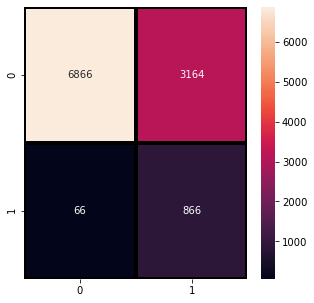

In [39]:
xgb = model_building('xgb', X_train_enc, y_train, X_cv_enc, y_cv, learning_rate = 0.05, folds = 3)
evaluation(xgb, X_cv_enc, y_cv)

### LightGBM

Training LightGBM model..........................................................................
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]

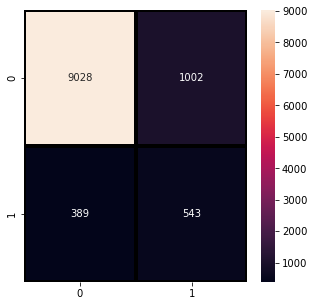

In [40]:
lgb = model_building('lgb', X_train_enc, y_train, X_cv_enc, y_cv, learning_rate = 0.05, folds = 3)
evaluation(lgb, X_cv_enc, y_cv)

### Extra Trees

Training Extra Trees model..........................................................................
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-

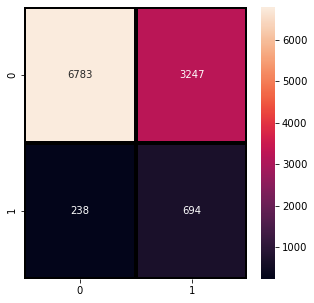

In [41]:
etc = model_building('etc', X_train_enc, y_train, X_cv_enc, y_cv, learning_rate = 0.05, folds = 3)
evaluation(etc, X_cv_enc, y_cv)

### Random Forest

Training Random Forest Classifier model..........................................................................
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.0min
[Para

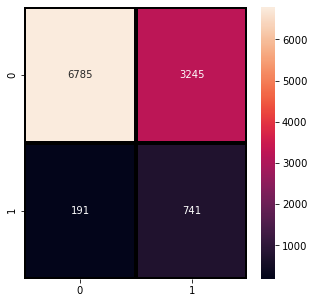

In [42]:
rfc = model_building('rfc', X_train_enc, y_train, X_cv_enc, y_cv, learning_rate = 0.05, folds = 3)
evaluation(rfc, X_cv_enc, y_cv)

### CatBoost 

Training CatBoost model..........................................................................
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6522409	test: 0.6521419	best: 0.6521419 (0)	total: 233ms	remaining: 13m 34s
1:	learn: 0.6145901	test: 0.6146680	best: 0.6146680 (1)	total: 312ms	remaining: 9m 5s
2:	learn: 0.5856654	test: 0.5857320	best: 0.5857320 (2)	total: 345ms	remaining: 6m 41s
3:	learn: 0.5605472	test: 0.5606043	best: 0.5606043 (3)	total: 387ms	remaining: 5m 37s
4:	learn: 0.5447301	test: 0.5448923	best: 0.5448923 (4)	total: 502ms	remaining: 5m 50s
5:	learn: 0.5243063	test: 0.5245170	best: 0.5245170 (5)	total: 589ms	remaining: 5m 42s
6:	learn: 0.5069686	test: 0.5071674	best: 0.5071674 (6)	total: 617ms	remaining: 5m 8s
7:	learn: 0.4919315	test: 0.4921189	best: 0.4921189 (7)	total: 642ms	remaining: 4m 40s
8:	learn: 0.4814025	test: 0.4815507	best: 0.4815507 (8)	total: 731ms	remaining: 4m 43s
9:	learn: 0.4694398	test: 0.4696926	best: 0.4696926 (9)	total: 807ms	remaining: 4m 41s
10:	learn: 0.4586851	test: 0.4588595	best: 0.4588595 (10)	total: 865ms	remaining: 4m 34s
11:	learn: 0.4497930	test: 0.4499592	best:

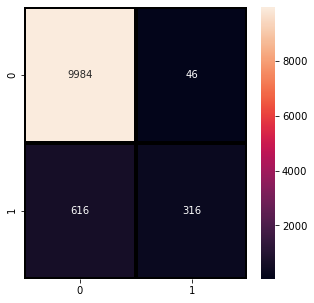

In [43]:
cbc = model_building('cbc', X_train, y_train, X_cv, y_cv, learning_rate = 0.05, folds = 3)
evaluation(cbc, X_cv, y_cv)

Extra trees and Random Forest perform poorly. CatBoost, LightGBM and XGBoost show promising results.

In [47]:
print(cbc.best_estimator_.get_params())

{'iterations': 3500, 'learning_rate': 0.060000000000000005, 'l2_leaf_reg': 4500, 'class_weights': [7, 12], 'random_strength': 6, 'max_depth': 7}


### Test Data

In [106]:
test = pd.read_csv('test_hr.csv')

In [114]:
test.head()

department     region   education gender  \
employee_id                                                    
8724                Technology  region_26  Bachelor's      m   
74430                       HR   region_4  Bachelor's      f   
72255        Sales & Marketing  region_13  Bachelor's      m   
38562              Procurement   region_2  Bachelor's      f   
64486                  Finance  region_29  Bachelor's      m   

            recruitment_channel  no_of_trainings       age  \
employee_id                                                  
8724                   sourcing         0.000992  0.023800   
74430                     other         0.012061  0.373901   
72255                     other         0.012776  0.396071   
38562                     other         0.014336  0.148142   
64486                  sourcing         0.010578  0.317340   

             previous_year_rating  length_of_service KPIs_met >80%  \
employee_id                                                          
8724                    -0.990666           0.000992             1   
74430                    0.036184           0.060307             0   
72255                    0.012776           0.051106             0   
38562                    0.009558           0.043009             0   
64486                    0.042312           0.074046             0   

            awards_won?  avg_training_score  total_training_score  \
employee_id                                                         
8724                  0            0.076358              0.076358   
74430                 0            0.615128              0.615128   
72255                 0            0.600495              0.600495   
38562                 0            0.310621              0.931863   
64486                 0            0.645259              0.645259   

             joining_age             kpi_dept kpi_ats_cat  kpi_ats_num  
employee_id                                                             
8724            0.022808         Technology_1        77_1     0.076358  
74430           0.313595                 HR_0        51_0     0.000000  
72255           0.344965  Sales & Marketing_0        47_0     0.000000  
38562           0.105133        Procurement_0        65_0     0.000000  
64486           0.243294            Finance_0        61_0     0.000000

In [108]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [109]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

test['previous_year_rating'] = test['previous_year_rating'].fillna(-999)

In [110]:
print(test.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [111]:
feature_generator(test)

In [112]:
normalize_standardize(data = test, operation = 'normalize')

In [113]:
if 'employee_id' not in test:
    test = test.reset_index()

submission = pd.DataFrame()

submission['employee_id'] = test.employee_id

test = test.set_index(['employee_id'])


In [115]:
X_train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

##### CatBoost 

In [74]:
cbc_pred = cbc.predict(test)
print(np.unique(cbc_pred, return_counts=True))

(array([0, 1], dtype=int64), array([22728,   762], dtype=int64))


##### LightGBM

In [116]:
test_enc = pd.DataFrame(encoding(test, method = 'onehot'))

In [117]:
test_enc.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'total_training_score', 'joining_age',
       'kpi_ats_num', 'department_1', 'department_2',
       ...
       'kpi_ats_cat_110', 'kpi_ats_cat_111', 'kpi_ats_cat_112',
       'kpi_ats_cat_113', 'kpi_ats_cat_114', 'kpi_ats_cat_115',
       'kpi_ats_cat_116', 'kpi_ats_cat_117', 'kpi_ats_cat_118',
       'kpi_ats_cat_119'],
      dtype='object', length=192)

In [125]:
X_train_enc.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'total_training_score', 'joining_age',
       'kpi_ats_num', 'department_1', 'department_2',
       ...
       'kpi_ats_cat_109', 'kpi_ats_cat_110', 'kpi_ats_cat_111',
       'kpi_ats_cat_112', 'kpi_ats_cat_113', 'kpi_ats_cat_114',
       'kpi_ats_cat_115', 'kpi_ats_cat_116', 'kpi_ats_cat_117',
       'kpi_ats_cat_118'],
      dtype='object', length=191)

In [127]:
test_enc = test_enc.drop(list(set(X_train_enc.columns).symmetric_difference(set(test_enc.columns))), axis = 1)

In [128]:
X_train_enc.columns == test_enc.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [129]:
lgb_pred = lgb.predict(test_enc)
print(np.unique(lgb_pred, return_counts=True))

(array([0, 1], dtype=int64), array([20266,  3224], dtype=int64))


### Submission

In [130]:
submission['is_promoted'] = lgb_pred
submission = submission.reindex(columns = ['employee_id', 'is_promoted'])

print(submission.head())
print(submission.shape)

   employee_id  is_promoted
0         8724            1
1        74430            0
2        72255            0
3        38562            0
4        64486            0
(23490, 2)


In [131]:
submission.to_csv("lgb1908.csv", index = False)